an MNIST digit classifier built with a fully-connected neural network in TensorFlow and Keras.

Ready Tensorflow

In [156]:
import numpy as np
import matplotlib.pyplot as plt

%tensorflow_version 2.x
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [157]:
# Load the MNIST dataset.
mnist = tf.keras.datasets.mnist

train_data, test_data = mnist.load_data()

# Divide the data into features(images) and labels.
train_images, train_labels = train_data
test_images, test_labels = test_data

# X_train = train_images[0:50000]
# X_validation = train_images[50000:60000]
# y_validation = train_labels[7000:10000]
# y_train = train_labels[0:7000]

# Reshape and normalize the images.
X_train = train_images.reshape((60000, 784))
X_train = X_train.astype('float32') / 255
X_test = test_images.reshape((10000, 784))
X_test = X_test.astype('float32') / 255

# Reshape the labels and encode them categorically.
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)



Training Images: (60000, 784)
Testing Images: (10000, 784)
Training Labels: (60000, 10)
Test Labels: (10000, 10)


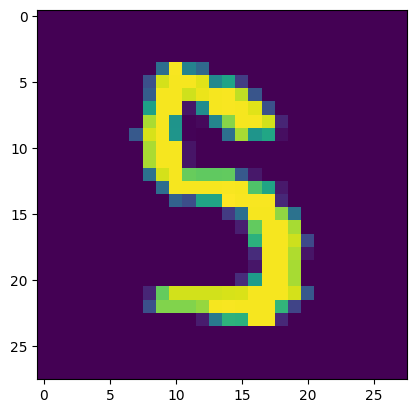

In [158]:
# Show the shapes of the data.
print("Training Images:", X_train.shape)
print("Testing Images:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Test Labels:", y_test.shape)

# Show a sample MNIST digit.
plt.imshow(train_images[748])
plt.show()



In [159]:
# Define the sequential model.
model = tf.keras.models.Sequential([
        # input layer. input data with size 28*28 and output size 256
        # 256 means you set up your modul with 256 NN in this layer.
        tf.keras.layers.Dense(256, input_shape=(28*28,), activation='relu'),

        # hidden layer. input data with size 256, which were same to output of input layer.
        # output size 256, we set up 256 NN again in this hidden layer.
        # no need to give input size here because keras already know.
        tf.keras.layers.Dense(256, activation='relu'),

        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.BatchNormalization(),  # Add batch normalization layer

        # output layer. the number of output should be your number of classification
        tf.keras.layers.Dense(10, activation='softmax')
    ])

# # Add two fully-connected layers to the network.
# model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
# model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Show the model.
model.summary()

# Compile the model.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 256)               200960    
                                                                 
 dense_66 (Dense)            (None, 256)               65792     
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_67 (Dense)            (None, 10)                2570      
                                                                 
Total params: 270346 (1.03 MB)
Trainable params: 269834 (1.03 MB)
Non-trainable params: 512 (2.00 KB)
_________________

In [160]:
# Define a callback to save the model when validation loss improves.
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='mnist_model.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

# Define the parameters.
num_epochs = 30
batch_size = 256

# Train the model.
history = model.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    # validation_data=(X_validation, y_validation),
                    validation_split=0.2)


Epoch 1/30
188/188 [==============================] - 5s 16ms/step - loss: 0.2951 - accuracy: 0.9110 - val_loss: 0.2883 - val_accuracy: 0.9534
Epoch 2/30
188/188 [==============================] - 3s 15ms/step - loss: 0.1142 - accuracy: 0.9664 - val_loss: 0.1180 - val_accuracy: 0.9668
Epoch 3/30
188/188 [==============================] - 3s 15ms/step - loss: 0.0720 - accuracy: 0.9794 - val_loss: 0.0975 - val_accuracy: 0.9697
Epoch 4/30
188/188 [==============================] - 4s 19ms/step - loss: 0.0547 - accuracy: 0.9835 - val_loss: 0.0939 - val_accuracy: 0.9702
Epoch 5/30
188/188 [==============================] - 3s 18ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0859 - val_accuracy: 0.9744
Epoch 6/30
188/188 [==============================] - 3s 15ms/step - loss: 0.0286 - accuracy: 0.9919 - val_loss: 0.0929 - val_accuracy: 0.9722
Epoch 7/30
188/188 [==============================] - 3s 15ms/step - loss: 0.0246 - accuracy: 0.9922 - val_loss: 0.0866 - val_accuracy: 0.9753

Test Accuracy: 0.9801999926567078
Test Loss: 0.09123674780130386


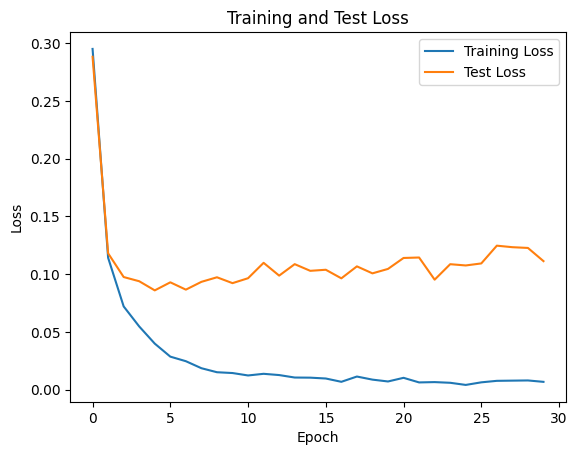

In [161]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

# Save the metrics.
metrics = history.history

# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']

# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Test Loss')
plt.legend()
plt.show()

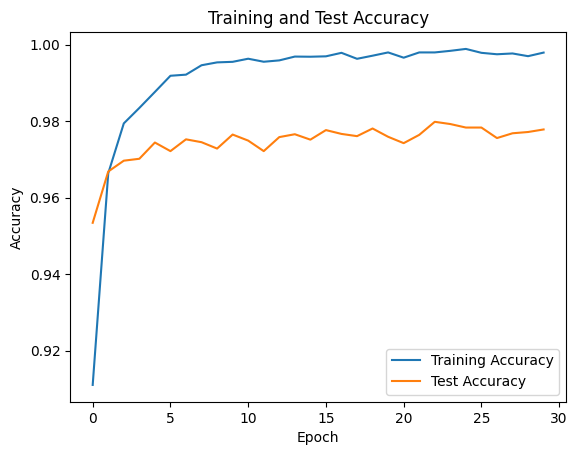

In [162]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']

plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Test Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 1s 3ms/step


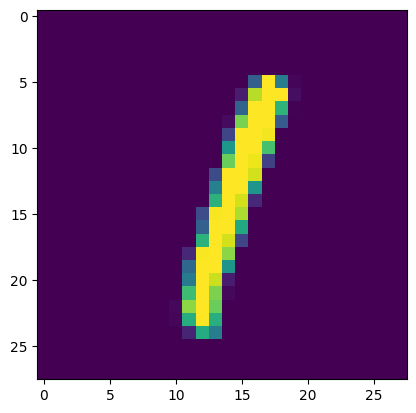

Prediction: 1


In [163]:
# Make predictions with the trained model.
predictions = model.predict(X_test)

# Choose an index.
index = 5

# Show an image from the test set.
plt.imshow(test_images[index])
plt.show()

print("Prediction:", np.argmax(predictions[index]))
